# <center> Curso Machine Learning e Imágenes en Python
    
* Docentes:  Dra. Valeria S. Rulloni - Dra. Ana Carolina Maldonado
* Colaboradores: Ing. Juan Manuel López
* Ing. Axel Aguerreberry -  Ing. Sebastián Palacio



## Temario a desarrollar:
*	**Uso y herramientas básicas de Python**
*	**Imágenes digitales: tipos (binarias, monocromáticas y a color)**
*	Histograma. Mejora de la imagen: contraste, filtros: suavizado y detección de bordes.
*	Umbralado y Binarización. Operaciones Morfológicas: erosión, dilatación, cierre y apertura.
*	Aplicaciones
*	Clasificación de imágenes.
*	Aprendizaje automático
*	Aprendizaje profundo: Redes neuronales
*	Aplicaciones 


**Recomendación:**
+ Antes que nada **realice una copia de este archivo y trabaje en ella** 

**CLASE 3:** 
    
archivos necesarios para la notebook: 'lenna.jpg', 'daisy.jpg', 'image_dfl.dcm','SYN00004' ,'000000' y 'ortopantomografia2.png'
    
**Imágenes: Conceptos Básicos**

Podemos definir una **imagen (monocroma)** como una función o arreglo bidimensional f. En cada coordenada [x,y] tenemos el valor f[x,y]  que es la intensidad de la imagen en dicho punto. Para imágenes en grises (monocroma) o binaria.


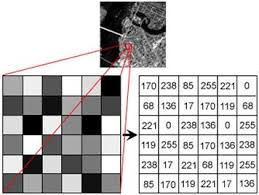

Al graficar esos datos, lo usual es que
       
        mín valor corresponde al negro                   máx valor corresponde al blanco.

Cada valor representa la intensidad del pixel

Si la intensidad se almacena/guarda como:

- uint8: entero sin signo de 8 bits, su valor pertenece al conjunto {0,1,2,... ,255}.

- uint16: entero sin signo de 16 bits su valor pertenece al conjunto {0,1,...,65535}

- float: número real (no toooodos pero una buena cantidad, negativos y positivos)

- bool (o los anteriores), la intensidad toma solo dos valores (en general: los valores 0 o 1.) Imagen binaria.


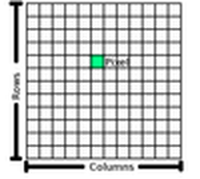

La indexación de la imagen en Python sigue la convención habitual de matrices, **primero fila y luego columna, pero comenzando en 0 c/u.**

En el caso de imágenes en grises (monocroma), al pixel le corresponde un número que es el valor de intensidad I[i,j], en la coordenada/lugar [i,j]

La coordenada [0,0] corresponde a la esquina superior izquierda de la imagen.
La coordenada [m-1, n-1] a la esquina inferior derecha.

* El **tamaño de la imagen**: Si es monocroma (en grises) o binaria es el número de filas por el número de columnas,  m×n. Cada punto corresponde a un píxel. 


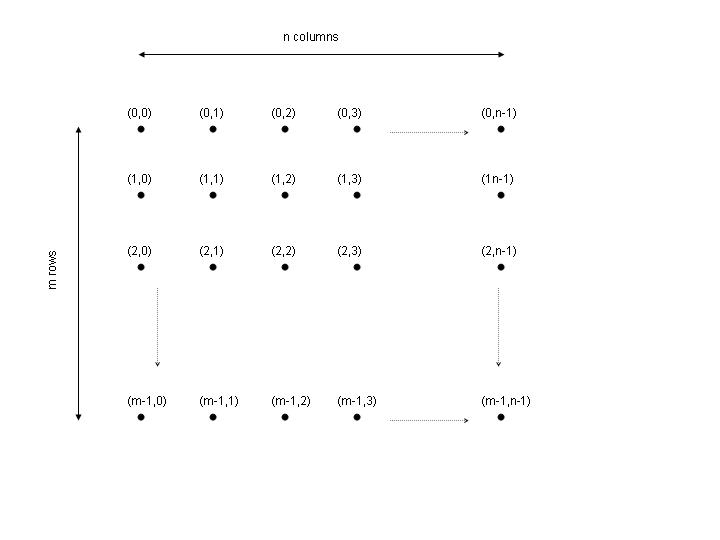

# 1. Generar imágenes usando arreglos/matrices

Generar imágenes con numpy y mostrarlas con imshow de matplotlib.pyplot


## 1.1 Imágenes binarias y monocromas (arreglos 2D)
### Ejemplos

**Generemos un matriz 100x100 de ceros (negra) con una franja horizontal de unos (blanca) en el centro:**

In [93]:
import numpy as np
matriz=  np.zeros((100,100))


#### Graficamos el arreglo generado con imshow de matplotlib 

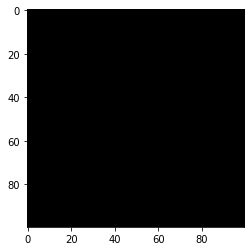

In [94]:
import matplotlib.pyplot as plt
plt.imshow(matriz, cmap='gray')
plt.show()

**Generar una cruz (negra,  valores 0) con fondo blanco (valor 1) de tamaño 192x192. Utilizar la función concatenar**


In [95]:
negro=np.zeros((64,64))
blanco=np.ones((64,64))

arriba=np.concatenate((blanco,negro,blanco),axis=1)

cruz=np.concatenate((arriba, np.zeros((64,192)),arriba),axis=0)

print(cruz.shape)

(192, 192)


#### Graficamos el arreglo generado con imshow de matplotlib 

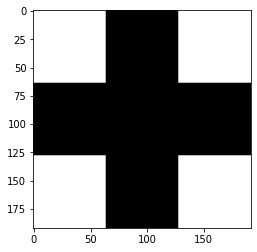

In [96]:
plt.imshow(cruz, cmap='gray')
plt.show()

In [97]:
#Otra forma:
cruz2=np.ones((192,192))
cruz2[:,64:129]=0
cruz2[64:129,:]=0
print(cruz2.shape)

(192, 192)


#### Ejercicio: mostrar el arreglo cruz2

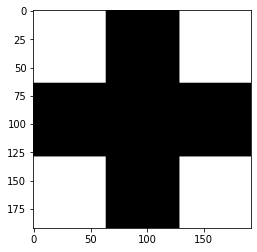

In [98]:
plt.imshow(cruz2, cmap='gray')
plt.show()

#### Ejercicio: Generar un tablero con 16(4x4) cuadrados de 8x8pixeles c/u y mostrarlo

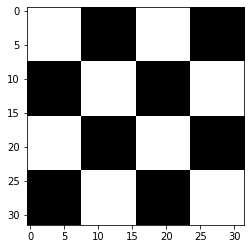

In [99]:
black=np.zeros((8,8))
white=np.ones((8,8))

tablero1=np.concatenate((white,black,white,black),axis=1)
tablero=np.concatenate((tablero1, 1-tablero1, tablero1, 1-tablero1), axis=0)
plt.imshow(tablero, cmap="gray")
plt.show()

#### Ejemplo: Crear imagen monocroma (un solo canal, en grises) 64x64 con intensidad creciente de izquierda a derecha

In [100]:
monocroma=np.zeros((64,64)) #dim: 64x64 (2D)
creciente=np.linspace(0,1,64) #dim: 64 (1D), vector creciente de 0 a 1

for i in range(64):
  monocroma[i,:]=creciente #sobreescribo cada fila: fila i, todas las columnas

print("dimensiones:", np.shape(monocroma), " tipo de dato en cada lugar:", monocroma.dtype)

dimensiones: (64, 64)  tipo de dato en cada lugar: float64


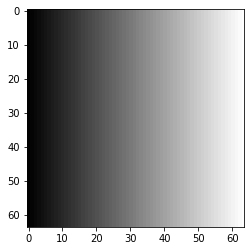

In [101]:
#Muestra con matplotlib #import matplotlib.pyplot as plt 
plt.imshow(monocroma, cmap='gray')#
plt.show()

**Ejercicio genere una imagen de tamaño 80x80 de intensidad creciente de 0 a 100 en dirección norte-sur**

In [102]:
monocroma2=np.empty((80,80))

norteaSur=np.linspace(0,100,80) #dim: 80 (1D), vector creciente de 0 a 1

for i in range(80):
  monocroma2[:,i]=norteaSur #sobreescribo cada fila: fila i, todas las columnas

print("dimensiones:", np.shape(monocroma2), " tipo de dato en cada lugar:", monocroma2.dtype)


dimensiones: (80, 80)  tipo de dato en cada lugar: float64


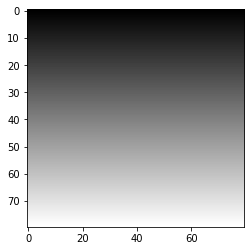

In [103]:
plt.imshow(monocroma2, cmap='gray')#
plt.show()

In [104]:
#sin for

line = np.linspace(0,100,80)
monocroma3 = np.repeat(line, 80, axis=0).reshape(80,80)
print(monocroma3.shape)

(80, 80)


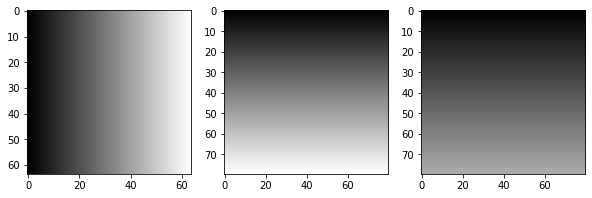

In [105]:
#Visualización con matplotlib
fig, axs = plt.subplots(nrows=1, ncols=3) #, sharex=True, sharey=True) #agregar
fig.set_figheight(7)
fig.set_figwidth(10)
axs[0].imshow(monocroma, cmap='gray', vmin=0, vmax=1)# 
axs[1].imshow(monocroma2, cmap='gray', vmin=0, vmax=100)# ojo con la visualización, agregar: vmin= ,vmax=
axs[2].imshow(monocroma3, cmap='gray', vmin=0, vmax=150)# 
plt.show()

## 1.2. Imágenes 3D: RGB 

En el caso de imágenes en color vamos a considerar el formato RGB (3 canales). También veremos imágenes satelitales (varios canales/bandas).

* Si es en color hay 3 valores de intensidad, uno por cada canal: R, G y B (red, green, blue).
* Si es imagen satelital hay tantos valores como bandas o canales tenga la imagen (depende de la cantidad de sensores del satélite).

Para RGB, el tamaño del array será MxNx3. almacenando así en cada posición [i,j] la intensidad de cada canal R, G y B. La intensidad del rojo (R) estará en el lugar [i,j,0], la intensidad del verde (G) estará en [i,j,1] y, por último la del azul (B) estará en [i,j,2]. 

* El **tamaño de la imagen**:  Si es a color RGB, es MxNx3. Si es salelital: MxNxk donde k es la cantidad de bandas (espectrales).

#### Ejercicio: Construir y mostrar una imagen a colores 256x256 píxeles.
* ****
* **Primeras 128 filas y 128 columnas (1er. cuadrante superior izquierdo) rojo puro**
* **2do cuadrante, verde**
* **3er cuadrante azul**
* **4to cuadrante amarillo (rojo+verde)**

In [106]:
import numpy as np

arr_image=np.zeros((256,256,3),'uint8') #3D, la tercera dimensión tiene 3 opciones: p/R, p/G y p/B
print(type(arr_image[0,0,0])) 

<class 'numpy.uint8'>


In [107]:
arr_image[0:128,0:128,0]=255 #rojo
arr_image[0:128,128:,1]=255 #verde
arr_image[128:,0:128,2]=255 #verde
arr_image[128:,128:,0]=255 #amarill9
arr_image[128:,128:,1]=255 #amarillo

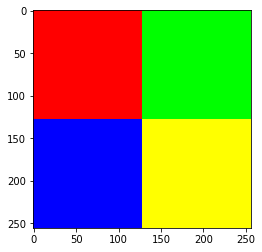

In [108]:
import matplotlib.pyplot as plt
plt.imshow(arr_image)

plt.show()

#### Ejercicio: Crear y mostrar una imagen 256x256, dividida en 4 cuadrados, cada uno con colores crecientes.

In [109]:
degrade=np.empty((128,128))
grado=np.linspace(0,255,128)

for i in range(64):
  degrade[i,:]=grado

arr_image=np.zeros((226,256,3),'uint8')
arr_image[0:128,:128,0]=degrade
arr_image[0:128,128:,1]=255
arr_image[128:,:128,2]=255
arr_image[128:,:128:,0]=255
arr_image[128:,128:,0]=255



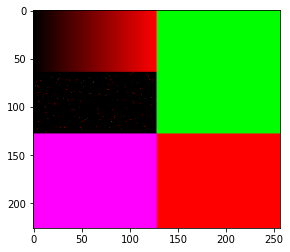

In [110]:
plt.imshow(arr_image);

# 2 Imágenes de archivos y librerías para imágenes:

## 2.1 Subir archivos a la nube para usarlos

Primero reiniciemos el entorno de ejecución

Luego subimos a memoria los archivos:
- 'lenna.jpg', 
- 'daisy.jpg', 
- 'image_dfl.dcm',
- 'SYN00004' ,
- '000000.dcm' y 
- 'ortopantomografia2.png'

En Jupiter Nootebook: basta con que estén en la misma carpeta (ubicación) que la ntb en la que están trabajando.

En Colab:

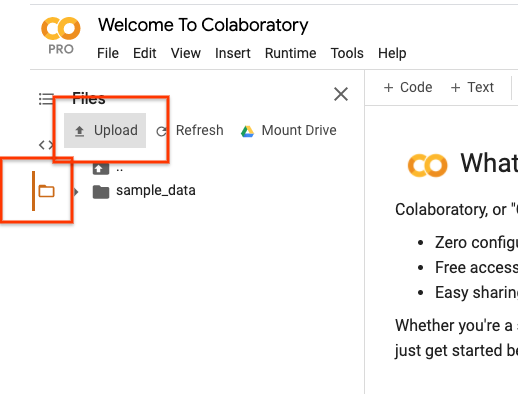

## 2.1 Librerías para imágenes

Hay varias librerías para el manejo de imágenes en Python, algunas tareas son compartidas aunque en general cada librería tiene su especialidad.
Las librerías que veremos serán:

**PILOW**

**OpenCV**

**SimpleITK**


La librería histórica es la **PIL (Python Image Library)**. Esta tiene un submódulo Image que antes era independiente, por eso es necesario indicarlo. Python no importa automáticamente los submódulos.
Actualmente la librería es la Pillow, pero se maneja igual.

**from PIL import Image**

o

**import PIL.Image**


- La librería PIL (PILLOW es una nueva versión más "friendly") permite cargar la imagen en memoria. Para manipular numéricamente los valores de intensidad es necesario convertirla en array con la librería numpy. 
- La librería SimpleITK también carga una imagen que es necesario convertir en array para manipularla, pero tiene una función propia para hacerlo.
- La librería OpenCV lleva la imagen a memoria directamente como matriz. Su tipo es ndarray.



**Observación** Será necesario instalar algunas librerías. 

En Colab o Jypyter Ntb: **!pip install nombre_libreria**

!pip install pillow

!pip install opencv

!pip install simpleitk

En Anaconda, por única vez: Desde Anaconda Promp (Anaconda Navigator: CMD.exe Prompt abre una consola), en la consola:

**conda install nombre_libreria**

conda install pillow

conda install opencv

conda install simpleitk


## 2.3 Librería PIL o PILLOW: submódulo Image
**Verificamos la versión instalada:**

In [111]:
#PIL Python Image Library
import PIL
print(PIL.__version__) #verificamos la versión instalada

7.1.2


In [112]:
#Si imprime la versión es porque la tiene instalada, con importar alcanza, 
#sino descomentar la siguiente linea y ejecutar este celda:
#!pip install pillow

In [113]:
%whos

Variable     Type             Data/Info
---------------------------------------
I            JpegImageFile    <PIL.JpegImagePlugin.Jpeg<...>12x512 at 0x7F4B1EB1E190>
I_array_3D   ndarray          354x364x3: 386568 elems, type `uint8`, 386568 bytes (377.5078125 kb)
Ig           PngImageFile     <PIL.PngImagePlugin.PngIm<...>12x512 at 0x7F4B1F9F3450>
Igris        Image            <PIL.Image.Image image mo<...>12x512 at 0x7F4B1F716C10>
Image        module           <module 'PIL.Image' from <...>t-packages/PIL/Image.py'>
PIL          module           <module 'PIL' from '/usr/<...>ackages/PIL/__init__.py'>
arr_image    ndarray          226x256x3: 173568 elems, type `uint8`, 173568 bytes (169.5 kb)
array_3D     ndarray          512x512x3: 786432 elems, type `uint8`, 786432 bytes (768.0 kb)
arriba       ndarray          64x192: 12288 elems, type `float64`, 98304 bytes
axs          ndarray          3: 3 elems, type `object`, 24 bytes
azul2D       ndarray          354x364: 128856 elems, type `u

In [114]:
from PIL import Image  #solo importaremos Image de PIL

I=Image.open('pics/lenna.jpg') #Abre la imagen (de archivo) y la carga en la variable I

In [115]:
%whos

Variable     Type             Data/Info
---------------------------------------
I            JpegImageFile    <PIL.JpegImagePlugin.Jpeg<...>12x512 at 0x7F4B1F922B90>
I_array_3D   ndarray          354x364x3: 386568 elems, type `uint8`, 386568 bytes (377.5078125 kb)
Ig           PngImageFile     <PIL.PngImagePlugin.PngIm<...>12x512 at 0x7F4B1F9F3450>
Igris        Image            <PIL.Image.Image image mo<...>12x512 at 0x7F4B1F716C10>
Image        module           <module 'PIL.Image' from <...>t-packages/PIL/Image.py'>
PIL          module           <module 'PIL' from '/usr/<...>ackages/PIL/__init__.py'>
arr_image    ndarray          226x256x3: 173568 elems, type `uint8`, 173568 bytes (169.5 kb)
array_3D     ndarray          512x512x3: 786432 elems, type `uint8`, 786432 bytes (768.0 kb)
arriba       ndarray          64x192: 12288 elems, type `float64`, 98304 bytes
axs          ndarray          3: 3 elems, type `object`, 24 bytes
azul2D       ndarray          354x364: 128856 elems, type `u

In [116]:
print("El tamaño de la imagen es",I.size)#imprime tamaño
print("El modo de la imagen es", I.mode) #indica si es en color, o gris
print("El formato de imagen es",I.format) #Si es png, pgm, jpg, etc.

I.show() #En Jupyter muestra la imagen original abriendo otra pantalla/ventana.

El tamaño de la imagen es (512, 512)
El modo de la imagen es RGB
El formato de imagen es JPEG


**Pasamos a Monocroma (grises), modo L**

ver: https://pillow.readthedocs.io/en/stable/handbook/concepts.html#concept-modes

los que usaremos son modo L (monocroma) y modo RGB , también hay modo RGBA (RGB con una transparencia) 

In [117]:
Igris=I.convert('L') #Convierte la imagen a monocroma. En este ejemplo se la guarda en otra variable

print ("El tamaño de la monocroma es ",Igris.size,"\nEl modo de la imagen en gris es ",Igris.mode)
print ("El formato de la monocroma es", Igris.format, ' pues sólo está en memoria') 

Igris.show() #En Jupyter: muestra la imagen monocroma en ventana emergente 

El tamaño de la monocroma es  (512, 512) 
El modo de la imagen en gris es  L
El formato de la monocroma es None  pues sólo está en memoria


### Guardamos la imagen monocroma en un archivo nuevo

In [118]:
Igris.save('lenagris.png') #Graba en archivo la imagen creada. Función propia de PIL

ver la lista de los archivos temporales, se puede descargar al disco

In [119]:
Ig=Image.open('lenagris.png') #Traemos a memoria la imagen grabada
print("El tamaño es ",Ig.size,". El modo es ",Ig.mode,". El formato es", Ig.format)


El tamaño es  (512, 512) . El modo es  L . El formato es PNG


**Como se dijo para poder manipular numéricamente los valores de intensidad es necesario usar la librería numpy. Para eso se debe convertir la imagen en un array.**

Abrimos con Image de PIL, pasamos a numpy y graficamos con imshow de matplotlib.pyplot

las dimensiones del arreglo son  (512, 512, 3) es RGB


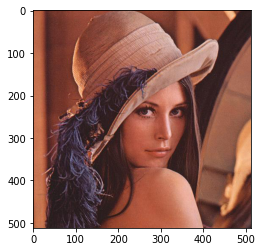

In [120]:
from PIL import Image
import numpy as np #me permite convertir imagen a array y manipular numéricamente las intensidades
import matplotlib.pyplot as plt 

#I=Image.open('lenna.jpg')
array_3D=np.array(I)
print('las dimensiones del arreglo son ', array_3D.shape, 'es RGB')
plt.imshow(array_3D) #para graficar convierte I en array, imshow (función de matplotlib.pyplot)
plt.show() 
#imshow muestra en la misma página. Si no muestra la imagen, correrlo nuevamente

In [121]:
print(array_3D.dtype, 'tipo de dato')
print('min:', np.min(array_3D), ', max:',np.max(array_3D))
#print('pixel elegido', array_3D[0,0,:] )
#print(array_3D)

uint8 tipo de dato
min: 0 , max: 255


(354, 364, 3) uint8


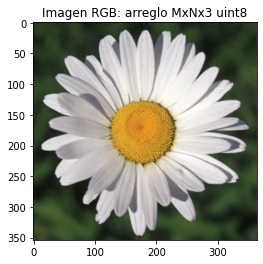

In [122]:
#from PIL import Image
#import numpy as np
#import matplotlib.pyplot as plt

ima=Image.open('pics/daisy.jpg')
I_array_3D=np.array(ima)
print(I_array_3D.shape, I_array_3D.dtype)

plt.imshow(I_array_3D) #para mostrar la imagen se usará plt.imshow()
plt.title('Imagen RGB: arreglo MxNx3 uint8')
plt.show()

**Separamos cada componente**

In [123]:
rojo2D=I_array_3D[:,:,0]
print("dimensiones de la componente roja (monocroma) =" , rojo2D.shape)

verde2D=I_array_3D[:,:,1]
print("dimensiones de la componente verde (monocroma) =" , verde2D.shape)

azul2D=I_array_3D[:,:,2]
print("dimensiones de la componente roja (monocroma) =" , azul2D.shape)

dimensiones de la componente roja (monocroma) = (354, 364)
dimensiones de la componente verde (monocroma) = (354, 364)
dimensiones de la componente roja (monocroma) = (354, 364)


[CMaps](https://matplotlib.org/stable/gallery/color/colormap_reference.html)

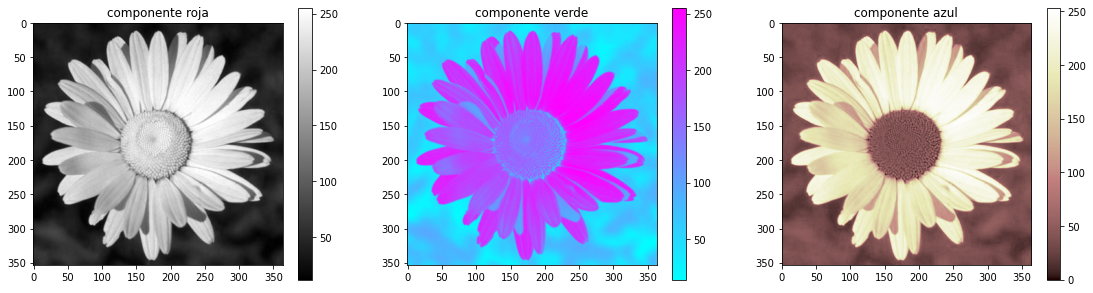

In [124]:
plt.figure(figsize=(19,5))

plt.subplot(131)
plt.imshow(rojo2D, cmap='gray')
plt.title('componente roja')
plt.colorbar()

plt.subplot(132)
plt.imshow(verde2D, cmap='cool')
plt.title('componente verde')
plt.colorbar()

plt.subplot(133)
plt.imshow(azul2D, cmap='pink')
plt.title('componente azul')
plt.colorbar()
plt.show()

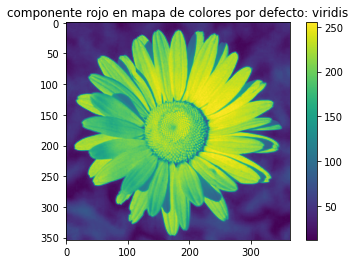

In [125]:
plt.imshow(rojo2D)
plt.title('componente rojo en mapa de colores por defecto: viridis')
plt.colorbar()
plt.show()

#### Uso de cmap (Color Map) o paleta de colores

![](paleta1.png)
![](paleta3.png)

https://matplotlib.org/examples/color/colormaps_reference.html

**Ejercicio modifique el arreglo 3D imagen RGB y Grafique**

Ejemplo "superponer" una franja roja o cruz verde 

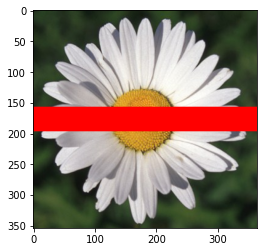

In [126]:
I_array_3D[157:197,0:,0]=255
I_array_3D[157:197,0:,1]=0
I_array_3D[157:197,0:,2]=0


plt.imshow(I_array_3D)


## 2.4 Librería SimpleITK
**Otra librería para manipulación y procesado de imágenes es SimpleITK.** 

In [127]:
#por única vez en CMD: conda install -c simpleitk simpleitk
!pip install simpleitk

In [128]:
import SimpleITK as sitk #http://simpleitk.github.io/SimpleITK-Notebooks/01_Image_Basics.html

In [129]:
%whos

Variable     Type             Data/Info
---------------------------------------
I            JpegImageFile    <PIL.JpegImagePlugin.Jpeg<...>12x512 at 0x7F4B1F922B90>
I_array_3D   ndarray          354x364x3: 386568 elems, type `uint8`, 386568 bytes (377.5078125 kb)
Ig           PngImageFile     <PIL.PngImagePlugin.PngIm<...>12x512 at 0x7F4B0F328190>
Igris        Image            <PIL.Image.Image image mo<...>12x512 at 0x7F4B1F7E4F50>
Image        module           <module 'PIL.Image' from <...>t-packages/PIL/Image.py'>
PIL          module           <module 'PIL' from '/usr/<...>ackages/PIL/__init__.py'>
arr_image    ndarray          226x256x3: 173568 elems, type `uint8`, 173568 bytes (169.5 kb)
array_3D     ndarray          512x512x3: 786432 elems, type `uint8`, 786432 bytes (768.0 kb)
arriba       ndarray          64x192: 12288 elems, type `float64`, 98304 bytes
axs          ndarray          3: 3 elems, type `object`, 24 bytes
azul2D       ndarray          354x364: 128856 elems, type `u

#### Abrir una imagen con SimpleITK


In [132]:
#import SimpleITK as sitk 
path="pics/lenna.jpg" #nombre del archivo (o ubicación/archivo, si está ubicada en otra carpeta)
ima=sitk.ReadImage(path) #lee el archivo y genera una variable TIPO IMAGEN
ima_arr = sitk.GetArrayFromImage(ima) #variable TIPO ARREGLO (3D)
print("La imagen del archivo", path)
print("la pasamos a arreglo numpy, de tamaño",ima_arr.shape)
print("tipo de dato en cada lugar:",ima_arr.dtype)


La imagen del archivo pics/lenna.jpg
la pasamos a arreglo numpy, de tamaño (512, 512, 3)
tipo de dato en cada lugar: uint8


Ejercicio: mostrar la imagen con imshow



In [133]:
import matplotlib.pyplot as plt


#### Ejercicio librería SimpleITK:
Abrir y graficar una imagen a elección (puede ser la imagen "daisy.jpg") Ayuda:sitk.ReadImage, sitk.GetArrayFromImage y plt.imshow

### Abrimos una imagen DICOM con SimpleITK

In [134]:
import matplotlib.pyplot as plt
import SimpleITK as sitk 

In [137]:
path="pics/image_dfl.dcm" #imagen de muestra 
#path="SYN00004" #mamografía anonimizada
#path="000000.dcm" #mamografía base DDSM
imagen=sitk.ReadImage(path)
print(type(imagen))

<class 'SimpleITK.SimpleITK.Image'>


In [138]:
array_imagen = sitk.GetArrayViewFromImage(imagen) #devuelve un array de 3D (1,...)
print(type(array_imagen))
print(array_imagen.shape)

<class 'numpy.ndarray'>
(1, 512, 512)


<class 'numpy.ndarray'>
(512, 512)
Valor máximo para uint16 2^16-1:  65535
valor de un pixel: 41  tipo de dato en el pixel:  <class 'numpy.uint8'>


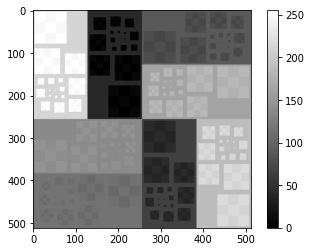

In [145]:
array2_imagen=array_imagen[0,:,:] #quitamos la primera "dimensión"
print(type(array2_imagen))
print(array2_imagen.shape)
print('Valor máximo para uint16 2^16-1: ',2**16-1)
if path=="pics/image_dfl.dcm" :
    print('valor de un pixel:', array2_imagen[100,250], ' tipo de dato en el pixel: ', type(array2_imagen[100,250]))
else:
    print('valor de un pixel en el lugar [1000,2500]:', array2_imagen[1000,2500])
    print('tipo de dato en el pixel: ', type(array2_imagen[1000,2500]))
    print('valor de un pixel en el lugar [1500,500]:', array2_imagen[1500,500])
plt.imshow(array2_imagen,cmap="gray")
plt.colorbar()
plt.show()

In [146]:
binaria=()

## 2.3 Librería OpenCV: cv2
La librería clásica por excelencia para el procesamiento de imágenes y visión por computadora es OpenCV (Computer Vision)
Para poder utilizarla en Python primero hay que instalarla:

In [141]:
import cv2
cv2.__version__ 

'4.1.2'

### Cargar imagen en memoria con OpenCV

In [143]:
#Los canales de colores en OpenCV son BGR!Cuidado!
Imagen=cv2.imread('pics/lenna.jpg')
print("El tipo de la primer imagen es ",type(Imagen))
print("El tipo de cada píxel es ",Imagen.dtype)
print("La dimensión de la imagen es ",Imagen.shape)

#A partir de shape podemos tomar variables con nombres más significativos
altura=Imagen.shape[0]
ancho=Imagen.shape[1]
canales=Imagen.shape[2]

print("La altura es",altura,".El ancho es ",ancho,".Los canales de color son ",canales)


El tipo de la primer imagen es  <class 'numpy.ndarray'>
El tipo de cada píxel es  uint8
La dimensión de la imagen es  (512, 512, 3)
La altura es 512 .El ancho es  512 .Los canales de color son  3


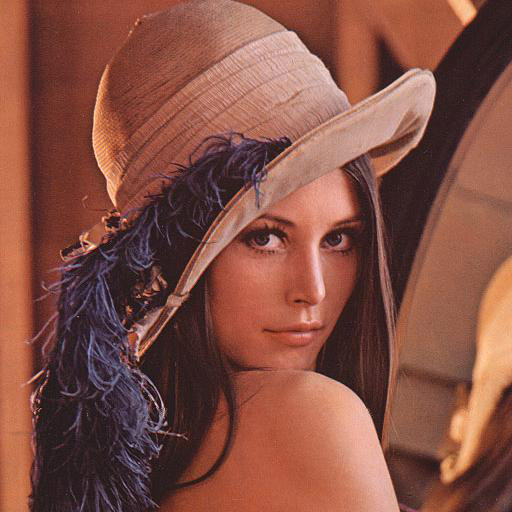

In [144]:
from google.colab.patches import cv2_imshow
cv2_imshow(Imagen) 

In [ ]:
#En Jupyter Notebook!!! no ejecutar en Colab
cv2.imshow('Presione una tecla para cerrar',Imagen)
cv2.waitKey(0) # waits until a key is pressed
cv2.destroyAllWindows() # destroys the window showing image

In [149]:
Imagen2=cv2.imread('pics/ortopantomografia2.png')
print("\nEl tipo de la segunda imagen es ",type(Imagen2))
print("El tipo de cada píxel es ",type(Imagen2[1,1,1]))
print("La dimensión de la imagen es ",Imagen2.shape)


El tipo de la segunda imagen es  <class 'numpy.ndarray'>
El tipo de cada píxel es  <class 'numpy.uint8'>
La dimensión de la imagen es  (267, 438, 3)


### Graficar la segunda imagen:


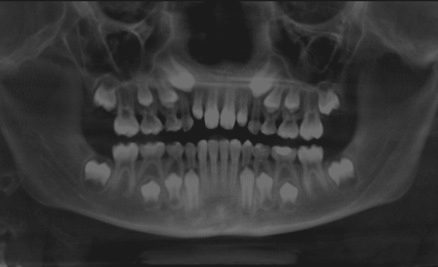

In [150]:
cv2_imshow(Imagen2)

In [151]:
print(Imagen2[6,5,:])

[51 51 51]
